## Support Vector Classifier comparison between Shogun and Sklearn.

We will do a comparison between Shogun's and SKlearn SVC implementations using a standard multi-class data-set using sklearn. Our dataset consists of  examples in which we will use "m" examples which will be increased progressively. 



Let's start with the imports!

In [28]:
import shogun as sg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

#Data reading
from sklearn.datasets import load_iris

###### READ THE CSV FILE  
Let's explore the dataset and see it's components. 

In [32]:
iris = load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [33]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [39]:
#Data preprocessing
def process_data(df):
            df=df.to_numpy().astype(float)
            X = df[:,:-1]
            y=df[:,-1]
            return X,y

        
X,y = process_data(df)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape

(100, 4)

In [37]:
#Parameters for plotting
time_skl = []
time_sgn = []
time_diff = []
accuracy_skl=[]
accuracy_sgn=[]
size = [1000,2000,3000,4000,X_train.shape[0]]

In [38]:
for m in size:
    print(m)


#SKLEARN
    X_train_temp = X_train[:m]
    y_train_temp = y_train[:m]
    skr = svm.SVC()

    t0 = time()
    skr.fit(X_train_temp, y_train_temp)
    tsk1 = time() - t0

    #Predict on test
    y_predict = skr.predict(X_test)
    err_skl = accuracy_score(y_test,y_predict)
    accuracy_skl.append(err_skl) #Accuracy score on entire testset
    
    


#SHOGUN
    train_features = sg.features(X_train_temp.T)
    labels_train = sg.MulticlassLabels(y_train_temp)

    
    C = 1.0
    gauss_kernel = sg.kernel("GaussianKernel", log_width=0.0)
    sg_svm=sg.machine("MulticlassLibSVM", C=C, kernel=gauss_kernel, labels=labels_train)
    


    t0 = time()
    sg_svm.train(train_features)
    tsg1= time() - t0

    #Apply to test set
    labels_predict=sg_svm.apply_multiclass(sg.features(X_test.T))
    labels_predict = np.array(labels_predict.get_labels())
    err_sgn = accuracy_score(y_test,labels_predict)
    accuracy_sgn.append(err_sgn)

    
    print("Sklearn time:  " + str(tsk1))
    print("SKL Accuracy: " + str(err_skl))
    print("Shogun time: " + str(tsg1))
    print("Shogun Accuracy: " + str(err_sgn))
    print('\n')
    
    time_skl.append(tsk1)
    time_sgn.append(tsg1)
    time_diff.append(tsk1-tsg1)


1000
Sklearn time:  0.3149592876434326
SKL Accuracy: 1.0
Shogun time: 0.08719348907470703
Shogun Accuracy: 0.28


2000
Sklearn time:  0.0009717941284179688
SKL Accuracy: 1.0
Shogun time: 0.007354736328125
Shogun Accuracy: 0.28


3000
Sklearn time:  0.0015337467193603516
SKL Accuracy: 1.0
Shogun time: 0.01121211051940918
Shogun Accuracy: 0.28


4000
Sklearn time:  0.0007975101470947266
SKL Accuracy: 1.0
Shogun time: 0.010404825210571289
Shogun Accuracy: 0.28


100
Sklearn time:  0.0007469654083251953
SKL Accuracy: 1.0
Shogun time: 0.010207653045654297
Shogun Accuracy: 0.28




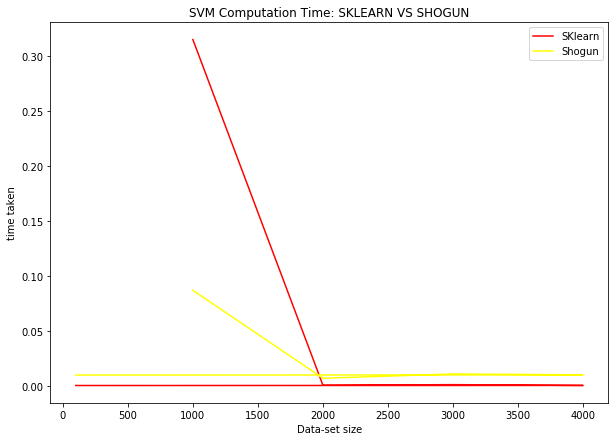

In [40]:
# PLOTTING ComputationTime
plt.figure(figsize=(10,7))
plt.title('SVM Computation Time: SKLEARN VS SHOGUN')
plt.plot(size,time_skl,color='red',label='SKlearn')
plt.plot(size,time_sgn,color='yellow',label='Shogun')
plt.xlabel('Data-set size')
plt.ylabel('time taken')
plt.legend()

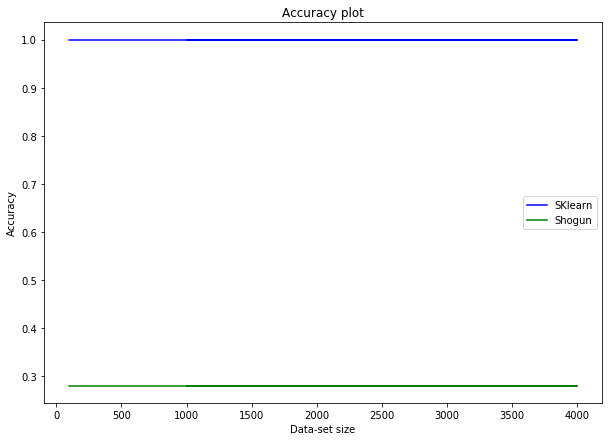

In [41]:
# PLOTTING Accuracy
plt.figure(figsize=(10,7))
plt.title('Accuracy plot')
plt.plot(size,accuracy_skl,color='blue',label='SKlearn')
plt.plot(size,accuracy_sgn,color='green',label='Shogun')
plt.xlabel('Data-set size')
plt.ylabel('Accuracy')
plt.legend()